# <b><span style='color:#F1A424'>AutoML - Multiclass Classification - BMI Value Prediction </span> </b>

### Disclaimer
The sample code (“Sample Code”) provided is not covered by any Teradata agreements. Please be aware that Teradata has no control over the model responses to such sample code and such response may vary. The use of the model by Teradata is strictly for demonstration purposes and does not constitute any form of certification or endorsement. The sample code is provided “AS IS” and any express or implied warranties, including the implied warranties of merchantability and fitness for a particular purpose, are disclaimed. In no event shall Teradata be liable for any direct, indirect, incidental, special, exemplary, or consequential damages (including, but not limited to, procurement of substitute goods or services; loss of use, data, or profits; or business interruption) sustained by you or a third party, however caused and on any theory of liability, whether in contract, strict liability, or tort arising in any way out of the use of this sample code, even if advised of the possibility of such damage.

## <b> Problem overview:</b>
    

**Dataset used: BMI Dataset**

**Features**:

- `gender`: Gender of person.
- `height`: Height of person.
- `weight`: Weight of person.

**Target Variable**:

- `bmi`: BMI value of person.

        
**Objective**:

The primary objective is typically to build a model that can accurately predict BMI of person.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','bmi')

In [5]:
# Fetching in teradata dataframe
bmi_df = DataFrame("bmi")

In [6]:
# first 5 rows
bmi_df.head()

gender,height,weight,bmi
Female,188,90,3
Female,159,104,5
Female,197,72,2
Female,196,159,5
Female,191,68,2
Female,146,123,5
Female,146,110,5
Female,166,133,5
Female,196,50,0
Female,162,58,2


In [7]:
# bmi_df dataset
bmi_df.shape

(500, 4)

In [8]:
# Removing less count category rows i.e, 0 and 1
bmi_df = bmi_df[(bmi_df.bmi != 0) & (bmi_df.bmi != 1)]

In [9]:
# bmi_df dataset
bmi_df.shape

(465, 4)

In [10]:
# Performing sampling to get 80% for trainning and 20% for testing
bmi_df_sample = bmi_df.sample(frac = [0.8, 0.2])

In [11]:
bmi_df_sample.head()

gender,height,weight,bmi,sampleid
Female,146,104,5,1
Female,178,154,5,1
Female,198,145,4,1
Female,146,157,5,1
Female,158,149,5,1
Female,158,153,5,1
Female,166,126,5,1
Female,151,64,3,1
Female,169,97,4,1
Female,172,67,2,1


In [12]:
# Fetching train and test data
bmi_df_train= bmi_df_sample[bmi_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
bmi_df_test = bmi_df_sample[bmi_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [13]:
# train data shape
bmi_df_train.shape

(372, 4)

In [14]:
# test data shape
bmi_df_test.shape

(93, 4)

In [15]:
#train dataset
bmi_df_train.head()

gender,height,weight,bmi
Female,172,67,2
Female,160,131,5
Female,157,153,5
Female,189,132,4
Female,185,81,2
Female,175,120,4
Female,171,152,5
Female,151,64,3
Female,169,97,4
Female,153,107,5


In [16]:
# test dataset
bmi_df_test.head()

gender,height,weight,bmi
Female,165,57,2
Female,183,150,5
Female,169,54,2
Female,188,80,2
Female,170,102,4
Female,161,134,5
Female,185,119,4
Female,168,139,5
Female,192,90,2
Female,164,82,4


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [23]:
# Creating AutoML instance
# Using xgboost model for model training.
# Keeping early stopping criteria max_models with value 6
# and verbose level 2 for detailed loggging

aml = AutoML(task_type="Classification",
             include='xgboost',
             max_models=6,
             verbose=2)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 372
Total Columns in the data: 4

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
bmi,INTEGER,372,0,None,0,372,0,0.0,100.0
gender,VARCHAR(20) CHARACTER SET LATIN,372,0,0,None,None,None,0.0,100.0
weight,INTEGER,372,0,None,0,372,0,0.0,100.0
height,INTEGER,372,0,None,0,372,0,0.0,100.0


        height   weight      bmi
func                            
50%    169.000  109.000    4.000
count  372.000  372.000  372.000
mean   168.989  110.054    3.997
min    140.000   50.000    2.000
max    199.000  160.000    5.000
75%    182.250  139.000    5.000
25%    155.000   83.750    3.000
std     16.219   30.835    1.063

Statistics of Data:


func,height,weight,bmi
50%,169,109,4
count,372,372,372
mean,168.989,110.054,3.997
min,140,50,2
max,199,160,5
75%,182.25,139,5
25%,155,83.75,3
std,16.219,30.835,1.063



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
gender                    2         

No Futile columns found.

Target Column Distribution:


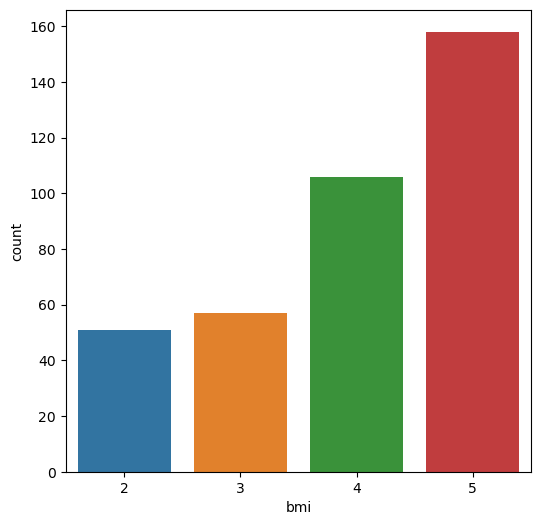

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
No outlier found!


gender,height,weight,bmi
Female,147,94,5
Female,160,83,4
Female,166,153,5
Female,181,94,3
Female,187,102,3
Female,188,122,4
Male,170,95,4
Male,174,90,3
Male,173,139,5
Male,159,154,5


Remaining Rows in the data: 367                                                         
Remaining Columns in the data: 4


Analysis indicates all categorical columns are significant. No action Needed.           


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


['gender']


gender_0,gender_1,height,weight,bmi,id
1,0,166,153,5,55
1,0,187,102,3,79
1,0,188,122,4,87
1,0,164,142,5,95
1,0,143,118,5,111
1,0,150,84,4,119
0,1,173,139,5,28
0,1,168,158,5,44
0,1,155,57,2,52
0,1,142,135,5,60


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
No outlier found!


['gender_1', 'height', 'weight']


['height', 'weight']


id,bmi,gender_1,height,weight
2,4,0,0.3389830508474576,0.3
4,5,0,0.4406779661016949,0.9363636363636364
5,2,1,0.2542372881355932,0.06363636363636363
6,3,0,0.6949152542372882,0.4
8,3,0,0.7966101694915254,0.4727272727272727
9,4,1,0.7966101694915254,0.6545454545454545
7,5,1,0.03389830508474576,0.7727272727272727
3,5,1,0.4745762711864407,0.9818181818181818
1,5,1,0.559322033898305,0.8090909090909091
0,5,0,0.11864406779661017,0.4


['height', 'weight']


['r_height', 'r_weight']


id,bmi,r_height,r_weight
2,4,0.3389830508474576,0.3
4,5,0.4406779661016949,0.9363636363636364
5,2,0.2542372881355932,0.06363636363636363
6,3,0.6949152542372882,0.4
8,3,0.7966101694915254,0.4727272727272727
9,4,0.7966101694915254,0.6545454545454545
7,5,0.03389830508474576,0.7727272727272727
3,5,0.4745762711864407,0.9818181818181818
1,5,0.559322033898305,0.8090909090909091
0,5,0.11864406779661017,0.4


['height', 'weight']


id,bmi,gender_0,gender_1,height,weight
55,5,1,0,0.4406779661016949,0.9363636363636364
79,3,1,0,0.7966101694915254,0.4727272727272727
87,4,1,0,0.8135593220338984,0.6545454545454545
95,5,1,0,0.4067796610169492,0.8363636363636363
111,5,1,0,0.05084745762711865,0.6181818181818182
119,4,1,0,0.1694915254237288,0.3090909090909091
28,5,0,1,0.559322033898305,0.8090909090909091
44,5,0,1,0.4745762711864407,0.9818181818181818
52,2,0,1,0.2542372881355932,0.06363636363636363
60,5,0,1,0.03389830508474576,0.7727272727272727


['col_0', 'col_1', 'col_2']


response_column : bmi                                                                                                                                 
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.1, 0.2)
max_depth : (5, 6, 7, 8)
min_node_size : (1, 2)
iter_num : (10, 20)
seed : 42
Total number of models for xgboost : 768
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,XGBOOST_1,lasso,0.888889,0.888889,0.888889,0.888889,0.893743,0.890104,0.887555,0.894391,0.888889,0.887258
1,2,XGBOOST_5,pca,0.851351,0.851351,0.851351,0.851351,0.854743,0.805479,0.823015,0.858455,0.851351,0.850751
2,3,XGBOOST_4,pca,0.432432,0.432432,0.432432,0.432432,0.214548,0.278646,0.234151,0.309902,0.432432,0.350252
3,4,XGBOOST_2,rfe,0.396825,0.396825,0.396825,0.396825,0.398428,0.397396,0.394433,0.399594,0.396825,0.394798
4,5,XGBOOST_3,rfe,0.396825,0.396825,0.396825,0.396825,0.398428,0.397396,0.394433,0.399594,0.396825,0.394798
5,6,XGBOOST_0,lasso,0.285714,0.285714,0.285714,0.285714,0.145889,0.293750,0.187071,0.143826,0.285714,0.183529


In [24]:
# Fitting train data
aml.fit(bmi_df_train, bmi_df_train.bmi)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [25]:
# Fetching Leaderboard
aml.leaderboard()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,XGBOOST_1,lasso,0.888889,0.888889,0.888889,0.888889,0.893743,0.890104,0.887555,0.894391,0.888889,0.887258
1,2,XGBOOST_5,pca,0.851351,0.851351,0.851351,0.851351,0.854743,0.805479,0.823015,0.858455,0.851351,0.850751
2,3,XGBOOST_4,pca,0.432432,0.432432,0.432432,0.432432,0.214548,0.278646,0.234151,0.309902,0.432432,0.350252
3,4,XGBOOST_2,rfe,0.396825,0.396825,0.396825,0.396825,0.398428,0.397396,0.394433,0.399594,0.396825,0.394798
4,5,XGBOOST_3,rfe,0.396825,0.396825,0.396825,0.396825,0.398428,0.397396,0.394433,0.399594,0.396825,0.394798
5,6,XGBOOST_0,lasso,0.285714,0.285714,0.285714,0.285714,0.145889,0.293750,0.187071,0.143826,0.285714,0.183529


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [26]:
# Fetching best performing model for dataset
aml.leader()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,XGBOOST_1,lasso,0.888889,0.888889,0.888889,0.888889,0.893743,0.890104,0.887555,0.894391,0.888889,0.887258


## <b><span style='color:#F1A424'>| 5.</span> Get Hyperparameter for Trained Model : </b>

In [27]:
aml.model_hyperparameters(rank=2)

{'response_column': 'bmi',
 'name': 'xgboost',
 'model_type': 'Classification',
 'column_sampling': 1,
 'min_impurity': 0.0,
 'lambda1': 0.1,
 'shrinkage_factor': 0.2,
 'max_depth': 7,
 'min_node_size': 1,
 'iter_num': 20,
 'seed': 42,
 'persist': False,
 'output_prob': True,
 'output_responses': ['2', '4', '3', '5'],
 'max_models': 2}

In [28]:
aml.model_hyperparameters(rank=4)

{'response_column': 'bmi',
 'name': 'xgboost',
 'model_type': 'Classification',
 'column_sampling': 0.6,
 'min_impurity': 0.1,
 'lambda1': 1,
 'shrinkage_factor': 0.1,
 'max_depth': 6,
 'min_node_size': 1,
 'iter_num': 10,
 'seed': 42,
 'persist': False,
 'output_prob': True,
 'output_responses': ['2', '4', '3', '5'],
 'max_models': 2}

## <b><span style='color:#F1A424'>| 6.</span> Generate Prediction and Performance Metrics : </b>

In [29]:
# Generating prediction on test data
prediction = aml.predict(bmi_df_test)

Data Transformation started ...


id,gender,weight,height,bmi
31,Female,82,164,4
47,Female,90,192,2
55,Female,57,165,2
63,Female,139,168,5
79,Female,150,183,5
87,Female,54,169,2
12,Male,145,144,5
20,Male,121,153,5
28,Male,80,144,4
36,Male,56,157,2


id,gender_0,gender_1,weight,height,bmi
223,1,0,132,154,5
183,1,0,109,172,4
364,0,1,124,159,5
263,1,0,158,151,5
244,0,1,105,183,3
343,1,0,99,188,3
383,1,0,51,153,2
175,1,0,110,146,5
95,1,0,80,188,2
196,0,1,155,148,5


id,gender_1,height,weight,bmi
383,0,153,51,2
284,1,174,107,4
156,1,162,97,4
263,0,151,158,5
55,0,165,57,2
135,0,153,146,5
223,0,154,132,5
15,0,182,126,4
244,1,183,105,3
343,0,188,99,3


id,bmi,gender_1,height,weight
183,4,0,0.5423728813559322,0.5363636363636364
223,5,0,0.23728813559322035,0.7454545454545455
15,4,0,0.711864406779661,0.6909090909090909
263,5,0,0.1864406779661017,0.9818181818181818
244,3,1,0.7288135593220338,0.5
343,3,0,0.8135593220338984,0.44545454545454544
55,2,0,0.423728813559322,0.06363636363636363
135,5,0,0.22033898305084745,0.8727272727272727
383,2,0,0.22033898305084745,0.00909090909090909
175,5,0,0.1016949152542373,0.5454545454545454


id,height,weight,bmi
284,174,107,4
55,165,57,2
135,153,146,5
263,151,158,5
223,154,132,5
15,182,126,4
244,183,105,3
343,188,99,3
95,188,80,2
196,148,155,5


id,bmi,r_height,r_weight
183,4,0.5423728813559322,0.5363636363636364
244,3,0.7288135593220338,0.5
343,3,0.8135593220338984,0.44545454545454544
263,5,0.1864406779661017,0.9818181818181818
55,2,0.423728813559322,0.06363636363636363
135,5,0.22033898305084745,0.8727272727272727
223,5,0.23728813559322035,0.7454545454545455
15,4,0.711864406779661,0.6909090909090909
95,2,0.8135593220338984,0.2727272727272727
196,5,0.13559322033898305,0.9545454545454546


id,bmi,gender_0,gender_1,height,weight
263,5,1,0,0.1864406779661017,0.9818181818181818
244,3,0,1,0.7288135593220338,0.5
343,3,1,0,0.8135593220338984,0.44545454545454544
284,4,0,1,0.576271186440678,0.5181818181818182
95,2,1,0,0.8135593220338984,0.2727272727272727
196,5,0,1,0.13559322033898305,0.9545454545454546
223,5,1,0,0.23728813559322035,0.7454545454545455
15,4,1,0,0.711864406779661,0.6909090909090909
383,2,1,0,0.22033898305084745,0.00909090909090909
175,5,1,0,0.1016949152542373,0.5454545454545454


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,id,col_0,col_1,col_2,bmi
0,183,-0.681740,-0.027306,-0.048810,4
1,284,0.732647,-0.029875,-0.080144,4
2,383,-0.684008,0.580690,-0.158623,2
3,263,-0.683721,-0.123595,0.513188,5
4,55,-0.682718,0.404762,-0.274341,2
5,95,-0.680191,-0.010548,-0.426650,2
6,244,0.733585,-0.117669,-0.206204,3
7,223,-0.683527,0.019221,0.318106,5
8,364,0.731148,0.023614,0.212530,5
9,156,0.731339,0.173223,0.011406,4


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being picked for evaluation:
Model ID : XGBOOST_1 
Feature Selection Method : lasso

Prediction : 
    id  Prediction  bmi    prob_2    prob_3    prob_4    prob_5
0  383           2    2  0.875846  0.088963  0.020821  0.014370
1   55           2    2  0.967036  0.016245  0.010470  0.006250
2  135           5    5  0.004770  0.009441  0.015224  0.970564
3  244           4    3  0.010981  0.056161  0.928976  0.003882
4  223           5    5  0.003990  0.011816  0.015615  0.968579
5   15           4    4  0.009975  0.015222  0.948059  0.026744
6  263           5    5  0.004008  0.007149  0.005214  0.983630
7  324           5    5  0.003852  0.012668  0.011463  0.972017
8   95           2    2  0.985250  0.007480  0.003782  0.003488
9  196           5    5  0.004008  0.007150  0.005055  0.983786

Confusion Matrix : 


array([[15,  2,  1,  0],
       [ 1,  8,  2,  0],
       [ 0,  1, 23,  0],
       [ 0,  1,  2, 37]], dtype=int64)

In [30]:
# Printing prediction
prediction.head()

id,Prediction,bmi,prob_2,prob_3,prob_4,prob_5
20,5,5,0.0065734808357699745,0.023403895895667756,0.02257988576923994,0.9474427374993223
28,4,4,0.0256418740968586,0.03806109843561501,0.894435436545288,0.04186159092223835
31,3,4,0.1067998606421078,0.43787068264314993,0.39234149516147804,0.06298796155326415
36,2,2,0.9574417301739402,0.028397862066580775,0.0093687048438488,0.004791702915630228
44,5,5,0.004945822276919229,0.009228377390956333,0.008639582291572339,0.9771862180405522
47,3,2,0.005995930243241813,0.9789582012732537,0.011782447762103264,0.003263420721401197
39,4,3,0.04591396365853169,0.32710011625038765,0.599021379785262,0.027964540305818682
23,3,3,0.030771493187342482,0.9378243914415731,0.022388909295955394,0.009015206075128776
15,4,4,0.009974868094409,0.015222167278904344,0.9480590023369692,0.026743962289717614
12,5,5,0.004791625014219031,0.009376012868176372,0.010851730987638178,0.9749806311299665


In [31]:
# Fetching performance metrics on test data
performance_metrics = aml.evaluate(bmi_df_test)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : XGBOOST_1 
Feature Selection Method : lasso

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  CLASS_3  CLASS_4  Precision    Recall        F1  Support
SeqNum                                                                                                
1               3  CLASS_2        2        8        1        1   0.666667  0.727273  0.695652       11
2               4  CLASS_3        1        2       23        2   0.821429  0.958333  0.884615       24
0               2  CLASS_1       15        1        0        0   0.937500  0.833333  0.882353       18
3               5  CLASS_4        0        0        0       37   1.000000  0.925000  0.961039       40
--------------------------------------------------------------------------------
   SeqNum              Metric  MetricValue
0       3        Micro-Recall     0.892473
1       5     Macro-Preci

In [32]:
performance_metrics

SeqNum,Prediction,Mapping,CLASS_1,CLASS_2,CLASS_3,CLASS_4,Precision,Recall,F1,Support
3,5,CLASS_4,0,0,0,37,1.0,0.925,0.961038961038961,40
0,2,CLASS_1,15,1,0,0,0.9375,0.8333333333333334,0.8823529411764706,18
2,4,CLASS_3,1,2,23,2,0.8214285714285714,0.9583333333333334,0.8846153846153847,24
1,3,CLASS_2,2,8,1,1,0.6666666666666666,0.7272727272727273,0.6956521739130435,11


In [33]:
# Generating prediction on test data
prediction = aml.predict(bmi_df_test, 2)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : XGBOOST_5 
Feature Selection Method : pca

Prediction : 
    id  Prediction  bmi    prob_2    prob_3    prob_4    prob_5
0  383           2    2  0.870650  0.069927  0.025590  0.033833
1   55           2    2  0.927135  0.028495  0.024789  0.019581
2   95           2    2  0.925916  0.028182  0.024399  0.021503
3  244           4    3  0.018641  0.019427  0.946201  0.015730
4  364           5    5  0.015817  0.015566  0.015928  0.952690
5  156           4    4  0.045345  0.041491  0.868558  0.044607
6  223           5    5  0.016309  0.017127  0.016626  0.949937
7  263           5    5  0.016309  0.017127  0.016626  0.949937
8  284           4    4  0.016062  0.016127  0.951984  0.015826
9  183           4    4  0.018157  0.017902  0.945991  0.017950

Confusion Matrix : 


array([[14,  3,  1,  0],
       [ 1,  7,  3,  0],
       [ 0,  2, 20,  2],
       [ 0,  0,  0, 40]], dtype=int64)

In [34]:
# Printing prediction
prediction.head()

id,Prediction,bmi,prob_2,prob_3,prob_4,prob_5
20,5,5,0.01581710766030708,0.015565705323479876,0.01592761057816096,0.9526895764380521
28,4,4,0.15420145136726152,0.13605957935851612,0.5394487977434931,0.17029017153072923
31,3,4,0.04735228018472415,0.7957889197082348,0.11442195495020904,0.042436845156831805
36,2,2,0.40057718402105585,0.3896958125983765,0.11382446341579486,0.09590253996477287
44,5,5,0.01581710766030708,0.015565705323479876,0.01592761057816096,0.9526895764380521
47,2,2,0.9227313676052085,0.03041318250524004,0.024905910616548895,0.021949539273002642
39,4,3,0.028045270680659005,0.22635012238443605,0.71939387311715,0.026210733817754916
23,2,3,0.7403848644911242,0.140139749879409,0.06484249258066344,0.054632893048803484
15,4,4,0.016045540973877413,0.015764301579265724,0.9509999310420701,0.017190226404786742
12,5,5,0.01581710766030708,0.015565705323479876,0.01592761057816096,0.9526895764380521


In [35]:
# Fetching performance metrics on test data
performance_metrics = aml.evaluate(bmi_df_test, 2)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : XGBOOST_5 
Feature Selection Method : pca

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  CLASS_3  CLASS_4  Precision    Recall        F1  Support
SeqNum                                                                                                
2               4  CLASS_3        1        3       20        0   0.833333  0.833333  0.833333       24
0               2  CLASS_1       14        1        0        0   0.933333  0.777778  0.848485       18
1               3  CLASS_2        3        7        2        0   0.583333  0.636364  0.608696       11
3               5  CLASS_4        0        0        2       40   0.952381  1.000000  0.975610       40
--------------------------------------------------------------------------------
   SeqNum              Metric  MetricValue
0       3        Micro-Recall     0.870968
1       5     Macro-Precisi

In [36]:
performance_metrics

SeqNum,Prediction,Mapping,CLASS_1,CLASS_2,CLASS_3,CLASS_4,Precision,Recall,F1,Support
3,5,CLASS_4,0,0,2,40,0.9523809523809523,1.0,0.975609756097561,40
0,2,CLASS_1,14,1,0,0,0.9333333333333333,0.7777777777777778,0.8484848484848485,18
2,4,CLASS_3,1,3,20,0,0.8333333333333334,0.8333333333333334,0.8333333333333334,24
1,3,CLASS_2,3,7,2,0,0.5833333333333334,0.6363636363636364,0.6086956521739131,11


## <b><span style='color:#F1A424'>| 7.</span> Deploy Trained Model : </b>

#### 7.1. Deploy top 3 models

In [37]:
aml.deploy(table_name='BMI_top_3_models', top_n=3)

Model Deployment Completed Successfully.


#### 7.2. Deploy models using list of model ranks

In [38]:
aml.deploy(table_name='BMI_mixed_models', ranks=[2, 4])

Model Deployment Completed Successfully.


#### 7.3. Deploy models using range of model rank

In [39]:
aml.deploy(table_name='BMI_range_models', ranks=range(3,6))

Model Deployment Completed Successfully.


##### Note: 
 - After deployment, saved models can be loaded in same session or different session using table name. After loading models can be used for predict and evaluate. Please refer to notebook: `Multi_Classification__BMI_Value_Prediction_Load_Models` for more details.

In [40]:
remove_context()

True